# Distributions and Clustering

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
USERS_PARQUET_PATH = "RefinedData/BeerAdvocate/users_with_scores.parquet"
users_df = pd.read_parquet(USERS_PARQUET_PATH)

In [3]:
users_df.describe()

,n_ratings,n_reviews,cfm_score,exp_score,xpl_score,adv_score,is_cfm,is_exp,is_xpl,is_adv
count,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000
mean,132.140068,41.577222,-1.521565,-0.455170,0.087978,0.072911,0.100004,0.029593,0.136058,0.100004
std,387.875528,221.338522,1.863792,0.210935,0.130990,0.125241,0.300007,0.169463,0.342853,0.300007
min,5.000000,0.000000,-63.747995,-3.542857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,-1.774929,-0.525845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,1.000000,-1.085113,-0.413928,0.043478,0.017544,0.000000,0.000000,0.000000,0.000000
75%,88.000000,10.000000,-0.680349,-0.331429,0.125000,0.095238,0.000000,0.000000,0.000000,0.000000
max,12046.000000,8970.000000,-0.003932,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Score Distributions and Clustering

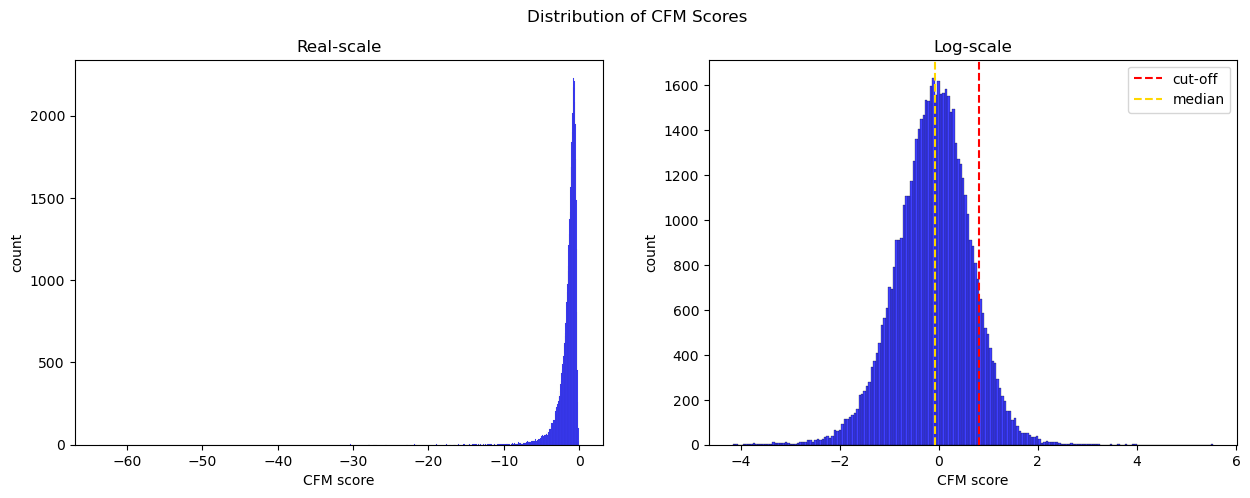

In [4]:
cfm_cutoff = users_df["cfm_score"].quantile(0.9)
cfm_median = users_df["cfm_score"].median()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Distribution of CFM Scores")

sns.histplot(data=users_df, x="cfm_score", ax=ax1, color="blue")
ax1.set_title("Real-scale")
ax1.set_xlabel("CFM score")
ax1.set_ylabel("count")
#ax1.axvline(x=cfm_cutoff, color="red", ls="--", label="cut-off")
#ax1.axvline(x=cfm_median, color="gold", ls="--", label="median")  
#ax1.legend()

sns.histplot(data=-np.log(-users_df["cfm_score"]), ax=ax2, color="blue")
ax2.set_title("Log-scale")
ax2.set_xlabel("CFM score")
ax2.set_ylabel("count")
ax2.axvline(x=-np.log(-cfm_cutoff), color="red", ls="--", label="cut-off")
ax2.axvline(x=(-np.log(-cfm_median)), color="gold", ls="--", label="median")
ax2.legend();

In [5]:
#fig.savefig("cfm_distribution.svg", transparent=True, dpi=400)

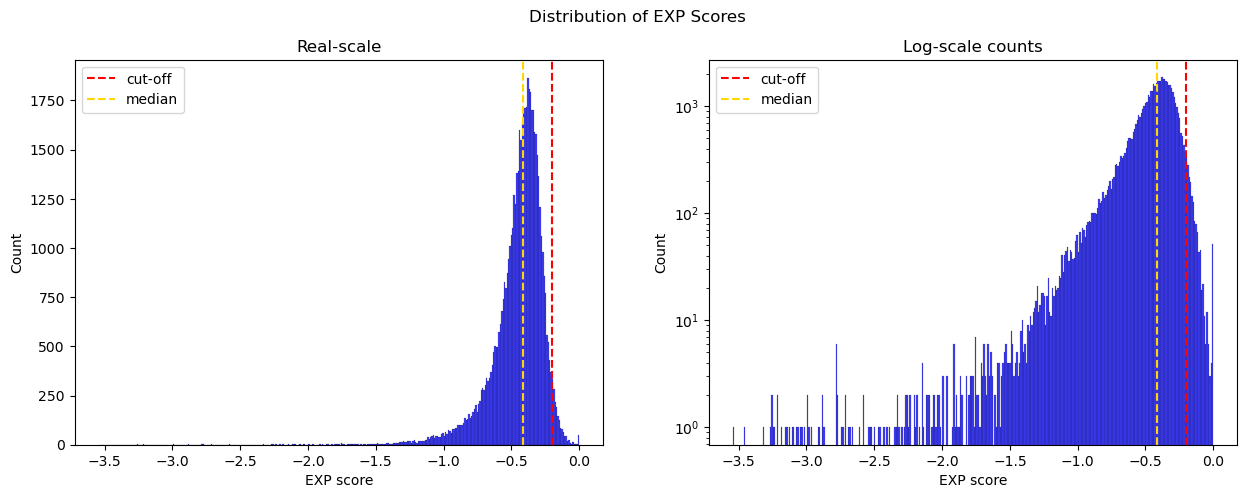

In [6]:
exp_cutoff = -0.2
exp_median = users_df["exp_score"].median()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Distribution of EXP Scores")

sns.histplot(data=users_df, x="exp_score", ax=ax1, color="blue")
ax1.set_title("Real-scale")
ax1.set_xlabel("EXP score")
ax1.set_ylabel("Count")
ax1.axvline(x=exp_cutoff, color="red", ls="--", label="cut-off")
ax1.axvline(x=exp_median, color="gold", ls="--", label="median")
ax1.legend()

sns.histplot(data=users_df, x="exp_score", ax=ax2, log_scale=(False, True), color="blue")
ax2.set_title("Log-scale counts")
ax2.set_xlabel("EXP score")
ax2.set_ylabel("Count")
ax2.axvline(x=exp_cutoff, color="red", ls="--", label="cut-off")
ax2.axvline(x=exp_median, color="gold", ls="--", label="median")
ax2.legend();

In [7]:
#fig.savefig("exp_distribution.svg", transparent=True, dpi=400)

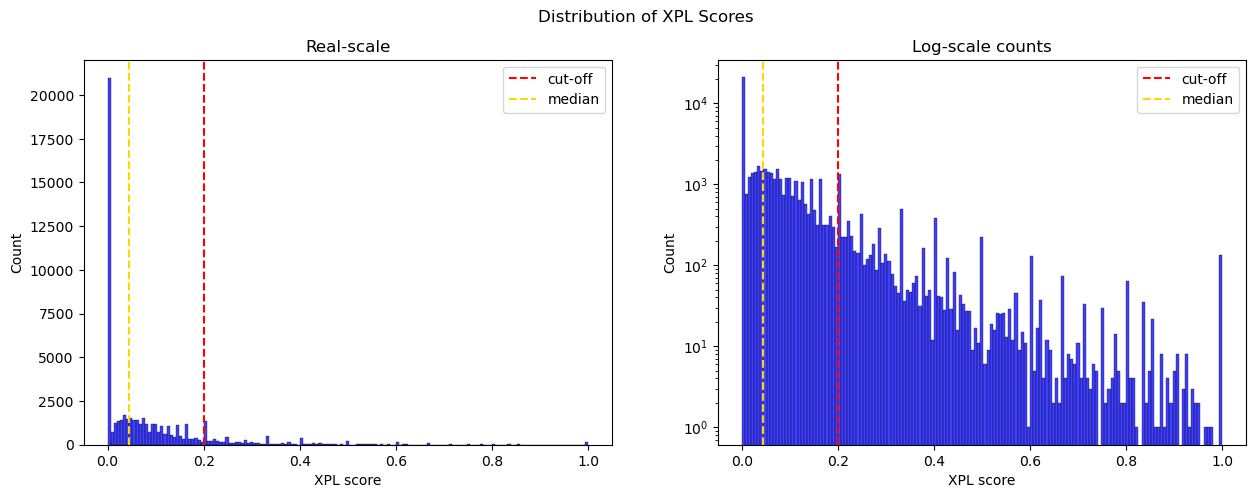

In [8]:
xpl_cutoff = users_df["xpl_score"].quantile(0.88)
xpl_median = users_df["xpl_score"].median()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Distribution of XPL Scores")

sns.histplot(data=users_df, x="xpl_score", ax=ax1, color="blue")
ax1.set_title("Real-scale")
ax1.set_xlabel("XPL score")
ax1.set_ylabel("Count")
ax1.axvline(x=xpl_cutoff, color="red", ls="--", label="cut-off")
ax1.axvline(x=xpl_median, color="gold", ls="--", label="median")  
ax1.legend()

sns.histplot(data=users_df, x="xpl_score", ax=ax2, log_scale=(False, True), color="blue")
ax2.set_title("Log-scale counts")
ax2.set_xlabel("XPL score")
ax2.set_ylabel("Count")
ax2.axvline(x=xpl_cutoff, color="red", ls="--", label="cut-off") 
ax2.axvline(x=xpl_median, color="gold", ls="--", label="median")       
ax2.legend();

In [9]:
#fig.savefig("xpl_distribution.svg", transparent=True, dpi=400)

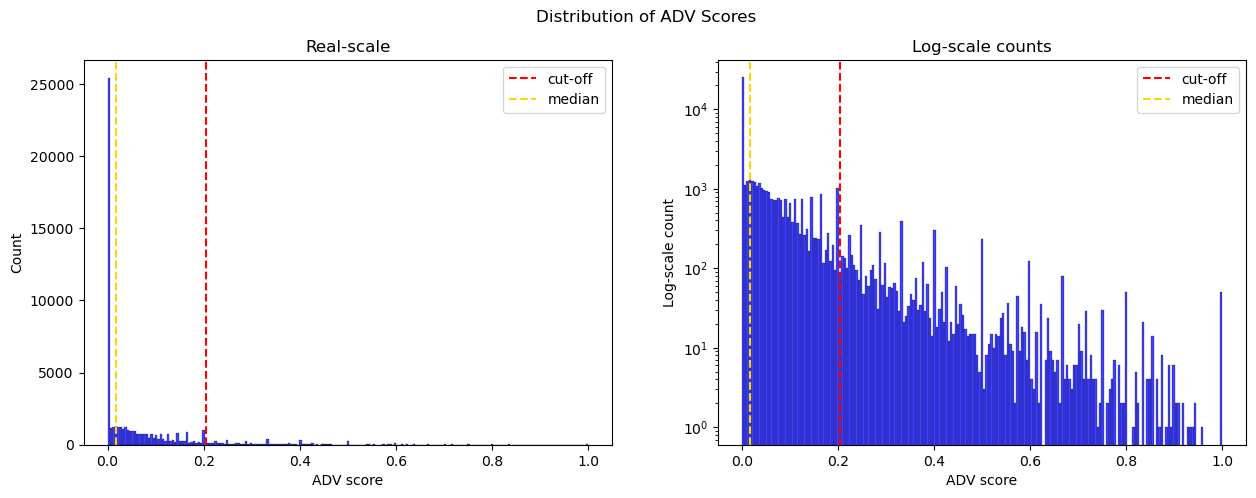

In [10]:
adv_cutoff = users_df["adv_score"].quantile(0.9)
adv_median = users_df["adv_score"].median()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Distribution of ADV Scores")

sns.histplot(data=users_df, x="adv_score", ax=ax1, color="blue")
ax1.set_title("Real-scale")
ax1.set_xlabel("ADV score")
ax1.set_ylabel("Count")
ax1.axvline(x=adv_cutoff, color="red", ls="--", label="cut-off")
ax1.axvline(x=adv_median, color="gold", ls="--", label="median")
ax1.legend()

sns.histplot(data=users_df, x="adv_score", ax=ax2, log_scale=(False, True), color="blue")
ax2.set_title("Log-scale counts")
ax2.set_xlabel("ADV score")
ax2.set_ylabel("Log-scale count")
ax2.axvline(x=adv_cutoff, color="red", ls="--", label="cut-off")
ax2.axvline(x=adv_median, color="gold", ls="--", label="median")
ax2.legend();

In [11]:
#fig.savefig("adv_distribution.svg", transparent=True, dpi=400)